In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
#from ml1 import fit, Linear, Sequential, ReLU, LogSoftmax

In [7]:
folder = "data"

In [8]:
X_train = np.load(os.path.join(folder, "X_train.npy"))
y_train = np.load(os.path.join(folder,"y_train.npy"))
X_valid = np.load(os.path.join(folder,"X_valid.npy"))
y_valid = np.load(os.path.join(folder,"y_valid.npy"))

In [9]:
X_traint = torch.as_tensor(X_train)
y_traint = torch.as_tensor(y_train)
X_validt = torch.as_tensor(X_valid)
y_validt = torch.as_tensor(y_valid)

In [10]:
y_traint.dtype, y_train.dtype, y_validt.dtype

(torch.int64, dtype('int64'), torch.int64)

In [11]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

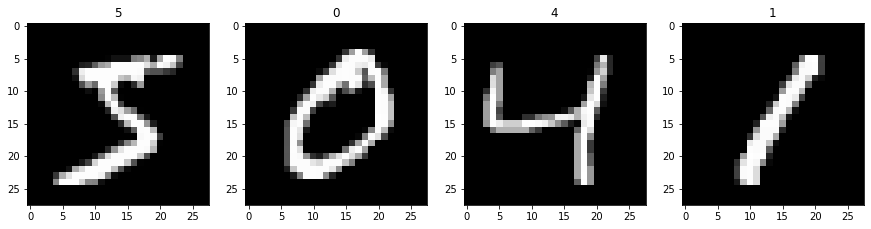

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(15 ,10))
for i in range(4):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i].reshape(-1, 28), cmap="gray")
plt.show()

In [179]:
def accuracy(preds, y_valid):
    values, idxs = preds.max(1)
    accuracy = float(torch.sum(idxs == y_valid))
    return accuracy

In [201]:
def validate(net, X_valid, y_valid, crit):
    with torch.no_grad():
        preds = net(X_valid)
        acc = accuracy(preds, y_valid) / X_valid.shape[0]
        loss = crit(preds, y_valid)
    return acc, loss

In [202]:
def step(net, X_batch, y_batch, crit, opt):
    opt.zero_grad()
    preds = net(X_batch)
    loss = crit(preds, y_batch)
    acc = accuracy(preds, y_batch)
    loss.backward()
    opt.step()
    return loss, acc

In [208]:
def fit(net, X_train, y_train, X_valid, y_valid, crit, opt, batch_size=100, n_epochs=1):
    set_size = X_train.shape[0]
    idxs = np.arange(set_size)
    n_batches = (set_size // batch_size)
    for epoch in range(n_epochs):
        np.random.shuffle(idxs)
        loss = 0
        acc = 0
        for batch in range(n_batches):
            start = batch * batch_size
            batch_idxs = idxs[start: start + batch_size]
            X_batch = X_train[batch_idxs]
            y_batch = y_train[batch_idxs]
            b_loss, b_acc = step(net, X_batch, y_batch, crit, opt)
            loss += b_loss
            acc += b_acc
        loss = loss / n_batches
        acc = acc / set_size
        acc_loss, val_loss = validate(net, X_valid, y_valid, crit)
        print(f"{epoch + 1} acc:{acc:.3f}, loss:{loss:.3f}, acc:{acc_loss:.3f}, val_loss:{val_loss:.3f}")

In [209]:
def view_some_preds(net, X, y):
    with torch.no_grad():
        output = net(X)
        values, preds = output.max(1)
        idxs = np.random.choice(preds.shape[0], size=16,replace=False)
        fig, ax = plt.subplots(4,4, figsize=(15, 10))
        plot_n = 0
        for i in range(4):
            for j in range(4):
                idx = idxs[plot_n]
                ax[i, j].set_title(str(int(preds[idx])) + "(" + str(int(y[idx])) + ")")
                ax[i, j].imshow(X[idx].reshape(28, 28), cmap="gray")
                ax[i, j].axis("off")
                plot_n += 1
        plt.show()

In [210]:
tnet = nn.Sequential(nn.Linear(28*28, 10), nn.ReLU(), nn.LogSoftmax())
crit = nn.NLLLoss()

In [211]:
opt = optim.SGD(tnet.parameters(), lr=0.01)

In [212]:
fit(tnet, X_traint, y_traint, X_validt, y_validt, crit, opt, n_epochs=20)

1 acc:0.741, loss:1.315, acc:0.857, val_loss:0.800
2 acc:0.850, loss:0.719, acc:0.878, val_loss:0.583
3 acc:0.864, loss:0.587, acc:0.886, val_loss:0.501
4 acc:0.872, loss:0.524, acc:0.890, val_loss:0.456
5 acc:0.878, loss:0.487, acc:0.894, val_loss:0.428
6 acc:0.882, loss:0.461, acc:0.897, val_loss:0.408
7 acc:0.885, loss:0.442, acc:0.901, val_loss:0.393
8 acc:0.887, loss:0.427, acc:0.903, val_loss:0.381
9 acc:0.890, loss:0.415, acc:0.904, val_loss:0.372
10 acc:0.891, loss:0.405, acc:0.905, val_loss:0.364
11 acc:0.893, loss:0.396, acc:0.905, val_loss:0.357
12 acc:0.895, loss:0.389, acc:0.907, val_loss:0.351
13 acc:0.896, loss:0.383, acc:0.907, val_loss:0.347
14 acc:0.896, loss:0.377, acc:0.908, val_loss:0.342
15 acc:0.898, loss:0.372, acc:0.909, val_loss:0.338
16 acc:0.899, loss:0.368, acc:0.910, val_loss:0.335
17 acc:0.900, loss:0.364, acc:0.911, val_loss:0.331
18 acc:0.901, loss:0.360, acc:0.911, val_loss:0.328
19 acc:0.902, loss:0.357, acc:0.912, val_loss:0.326
20 acc:0.902, loss:0.

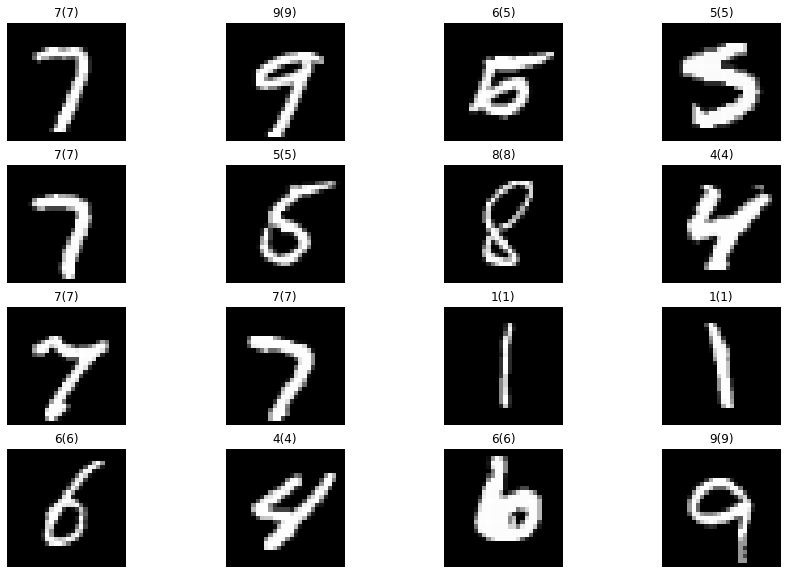

In [21]:
view_some_preds(tnet, X_traint, y_traint)

In [213]:
cnet = nn.Sequential(nn.Conv2d(1, 8, 5), nn.ReLU(), nn.MaxPool2d(4), nn.Flatten(), nn.Linear(288, 10), nn.LogSoftmax())
crit = nn.NLLLoss()

In [214]:
opt = optim.SGD(cnet.parameters(), lr=0.01)

In [215]:
X_trainc = X_traint.view((-1, 1, 28, 28)) 
X_validc = X_validt.view((-1, 1, 28, 28)) 

In [216]:
fit(cnet, X_trainc, y_traint, X_validc, y_validt, crit, opt, n_epochs=10)

1 acc:0.610, loss:1.546, acc:0.863, val_loss:0.625
2 acc:0.869, loss:0.501, acc:0.901, val_loss:0.366
3 acc:0.899, loss:0.364, acc:0.918, val_loss:0.297
4 acc:0.914, loss:0.306, acc:0.929, val_loss:0.257
5 acc:0.925, loss:0.268, acc:0.937, val_loss:0.229
6 acc:0.931, loss:0.241, acc:0.944, val_loss:0.207
7 acc:0.938, loss:0.220, acc:0.949, val_loss:0.191
8 acc:0.943, loss:0.203, acc:0.952, val_loss:0.179
9 acc:0.946, loss:0.189, acc:0.956, val_loss:0.167
10 acc:0.949, loss:0.177, acc:0.959, val_loss:0.157


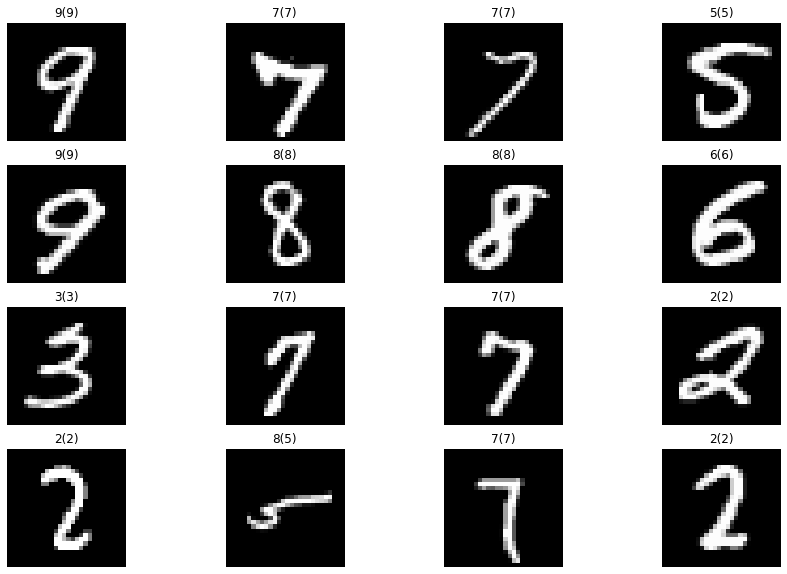

In [134]:
view_some_preds(cnet, X_trainc, y_traint)